inspect all patches of the patch grid of a single SlideContainer and visualize the segmentation into patches

In [ ]:
from scanner_domain_shift.utilities_and_helpers.slide.process_slides import load_slides
from scanner_domain_shift.utilities_and_helpers.slide.customDataLoader import generate_dataloaders
from scanner_domain_shift.utilities_and_helpers.slide.custom_slide_container import *
import matplotlib.pyplot as plt
import numpy as np
from scanner_domain_shift.utilities_and_helpers.slide.label_helper import *




# Example usage: Load label dictionary
annotation_file = 'data/scc.json'
label_dict = load_label_dict(annotation_file)
reverse_dict = reverse_label_dict(label_dict)

# Load WSIs and divide them into patches (no sampling yet)
train_files, valid_files, test_files = load_slides(
    patch_size=224,
    label_dict=label_dict,
    level=0,
    image_path='/path/to/your/images',  # Replace with your image directory
    annotation_file=annotation_file,
    scanner='nz210',
    excluded_labels={-1,0}, # Exclude unassigned and background labels
    negative_class_labels = {1,2,3,4,5,6},
    positive_class_labels = {7,8,9,10,11,12,13} #tumor
)

# Print dataset statistics
print(f"Number of train files: {len(train_files)}")
print(f"Number of valid files: {len(valid_files)}")
print(f"Number of test files: {len(test_files)}")

print("excluded labels are", valid_files[0].excluded_labels)
print("negative labels are", valid_files[0].negative_class_labels)
print("positive labels are", valid_files[0].positive_class_labels)



# print(valid_files[1].tissue_classes)
# print(f"labels are {valid_files[1].labels}")
# x_patch, y_patch = valid_files[1].get_patch_from_grid(1)
# print(y_patch)
# print(np.unique(y_patch))
# print(y_patch.shape)

# Inspect the first validation slide's patches
# inspect_all_patches(valid_files[1], reverse_dict)
# valid_files[1].visualize_grid()

reverse_dict = { 2: "excluded", 1 : "tumor", 0: "normal"}
label_dict = { "excluded": 2, "tumor": 1, "normal": 0}



44it [01:47,  2.43s/it]

Number of train files: 30
Number of valid files: 5
Number of test files: 9
excluded labels are {0, -1}
negative labels are {1, 2, 3, 4, 5, 6}
positive labels are {7, 8, 9, 10, 11, 12, 13}


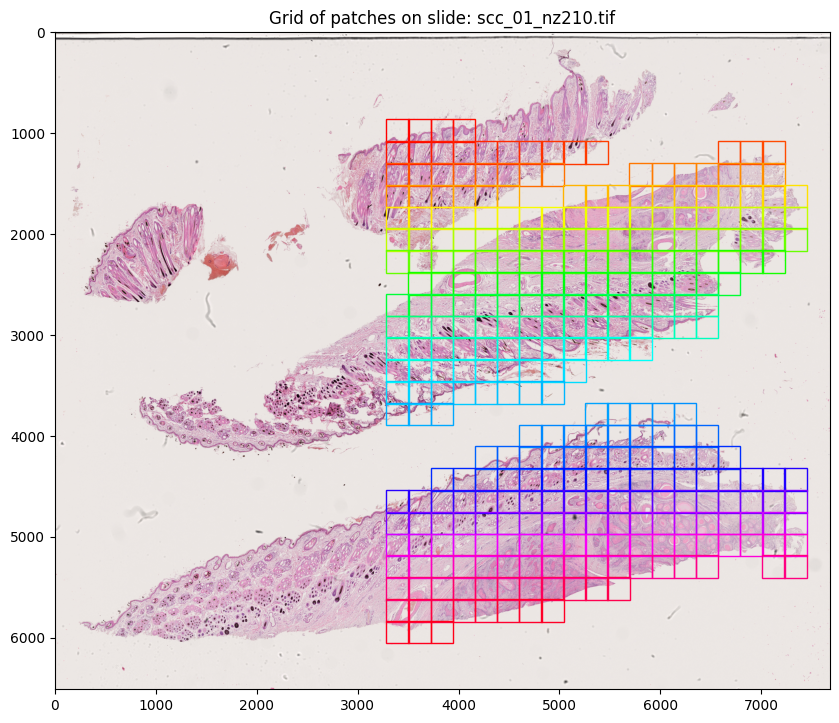

In [4]:
train_files[0].visualize_grid()


In [ ]:
# Inspect all patches using the new `patch_grid` approach
def inspect_all_patches(slide_container, reverse_dict, excluded_labels={}):
    print("-------------------------------------------------------------")
    print(f"Inspecting all patches for {slide_container.get_file_name()}")
    all_unique_labels = set()

    # Get the file name of the slide
    slide_file_name = slide_container.get_file_name()

    # Get all patches for the slide
    patches = slide_container.get_patches()
    print(f"slide shape: {slide_container.get_slide_shape()}")  # Print the shape of the slide
    print(f"Number of patches: {len(patches)}")  # Print the number of patches    
    print("stride is", slide_container.x_stride, slide_container.y_stride)

    counter = 0
    num_of = 0
    for x, y in patches:
    
        #check if the patch contains tumor
        uniqueY = np.unique(slide_container.get_y_patch(x, y))
        # print(f"uniqueY is {uniqueY}")
        # print("slide_container.positive_class_labels", slide_container.positive_class_labels)
        if np.any(np.isin(uniqueY, list(slide_container.positive_class_labels))):

        # doesn't contain tumor 
        # if np.all(~np.isin(uniqueY, list(slide_container.positive_class_labels))):

            num_of += 1
            print(uniqueY)
            print(f"Patch at ({x}, {y}) contains tumor")
            patch = slide_container.get_patch(x, y)
            y_patch = slide_container.get_2class_y_patch(x, y)
            # print(f"Patch shape: {patch.shape}")

            unique_labels = np.unique(y_patch)

            if counter < 5:
                counter += 1
                # Display the patch
                plt.imshow(patch)
                plt.title(f"Patch from {slide_file_name} at ({x}, {y})")
                plt.show()
            

            all_unique_labels.update(unique_labels)

    # Print reverse_dict for debugging
    print("reverse_dict:", reverse_dict)
    print("num_of value", num_of)

    # Convert numerical labels back to categories for all unique labels
    unique_categories = [reverse_dict.get(label, "Unknown") for label in all_unique_labels]

    print("All unique annotation labels:", all_unique_labels)
    print("All unique annotation categories:", unique_categories)
    
    print("-------------------------------------------------------------")


#use it
inspect_all_patches(train_files[1], reverse_dict)